## Classificació

Seguim amb els models d'aprenentage supervisat, en aquest cas ens centrem en els algorismes de classificació.  
En aquest cas disposem d'una serie d'atributs x i un conjunt de resultats y. Les diferents tècniques es basen en treballar sobre les x per entrenar un model que ens proporcioni les y. L'aplicació del model sobre el conjunt de test ens donarà mostra de l'èxit de la tècnica aplicada

Comencem llegir el fitxer amb les dades preprocessades que hem preparat en les etapes anteriors i farem una transformació de normalització que consisteix en modificar els atributs no categòrics perquè tots tinguin valors entre 0 i 1.

In [96]:
#Llegim el fitxer amb les dades preprocessades

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fitxer="D:/Users/X/Downloads/smoking_drinking_dataset_pre.csv"
dataset=pd.read_csv(fitxer,encoding='utf-8',sep=',')

# Seleccionem les variables que volem incloure en el model de classificació
df=dataset[['PAS', 'PAD','NGS','colesterol_total', 'colesterol_LDL','colesterol_HDL',
            'triglicerid', 'hemoglobina', 'creatinina',
            'transaminasa_AST', 'transaminasa_ALT', 'transferasa_GGT',
            'genere_num','bevedor_num','nivell_fumador_num'
          ]]
#print(df.shape)
#Reduim la mostra perque el cost de dibuixar l'arbre de decissió és massa alt
df=df.sample(n=1000,random_state=1)
df.reset_index(drop=True,inplace=True)

# Transformació de dades.
# En aquest cas he decidit normalitzar les dades perquè tots els atributs tinguin valors entre 0 i 1

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import normalize

columnes=df.columns
#print(columnes)
#df_cat=df[['genere_num','bevedor_num','nivell_fumador_num']]
#columnes numeriques continues
df_num=df[['PAS', 'PAD','NGS','colesterol_total', 'colesterol_LDL','colesterol_HDL',
            'triglicerid', 'hemoglobina', 'creatinina',
            'transaminasa_AST', 'transaminasa_ALT', 'transferasa_GGT']]

# columnes categoriques
df_bin=df[['genere_num','bevedor_num','nivell_fumador_num']]

#Transformacio de les dades
#Utilitzem MinMaxScaler per disposar els atributs del dataframe en la mateixa escala
scaler = MinMaxScaler()
#scaler = RobustScaler()
df_scaled = scaler.fit_transform(df[df.columns[0:-3]])
df_scaled=pd.DataFrame(df_scaled)
#incorporem nom de les columnes
df_scaled.columns=['PAS', 'PAD','NGS','colesterol_total', 'colesterol_LDL','colesterol_HDL',
            'triglicerid', 'hemoglobina', 'creatinina',
            'transaminasa_AST', 'transaminasa_ALT', 'transferasa_GGT']
#afegim les columnes categòriques
df_scaled = pd.concat([df_scaled,df_bin], axis = 1,ignore_index=True)
df_scaled.columns=columnes
#print(columnes)
df=df_scaled
df

PAS       PAD       NGS  colesterol_total  colesterol_LDL  \
0    0.369369  0.500000  0.813008          0.589744        0.362573   
1    0.234234  0.220588  0.243902          0.548718        0.578947   
2    0.072072  0.205882  0.243902          0.353846        0.333333   
3    0.288288  0.397059  0.341463          0.666667        0.555556   
4    0.414414  0.529412  0.520325          0.323077        0.385965   
..        ...       ...       ...               ...             ...   
995  0.207207  0.147059  0.552846          0.800000        0.678363   
996  0.306306  0.250000  0.455285          0.564103        0.502924   
997  0.279279  0.279412  0.325203          0.338462        0.315789   
998  0.279279  0.338235  0.292683          0.723077        0.736842   
999  0.135135  0.132353  0.536585          0.302564        0.280702   

     colesterol_HDL  triglicerid  hemoglobina  creatinina  transaminasa_AST  \
0            0.8000     0.646840     0.596154    0.375000          0.634921   
1            0.6250     0.074349     0.490385    0.291667          0.476190   
2            0.6375     0.141264     0.528846    0.375000          0.349206   
3            0.4125     0.888476     0.721154    0.291667          0.285714   
4            0.3000     0.356877     0.673077    0.541667          0.222222   
..              ...          ...          ...         ...               ...   
995          0.8625     0.312268     0.432692    0.458333          0.190476   
996          0.7125     0.230483     0.576923    0.208333          0.126984   
997          0.5875     0.208178     0.480769    0.375000          0.349206   
998          0.5875     0.263941     0.509615    0.458333          0.666667   
999          0.6625     0.081784     0.740385    0.458333          0.476190   

     transaminasa_ALT  transferasa_GGT  genere_num  bevedor_num  \
0            0.478261         0.446043           0            1   
1            0.304348         0.143885           0            0   
2            0.260870         0.100719           0            0   
3            0.500000         0.388489           1            1   
4            0.521739         0.633094           1            1   
..                ...              ...         ...          ...   
995          0.304348         0.143885           0            1   
996          0.086957         0.057554           0            1   
997          0.195652         0.143885           0            0   
998          0.326087         0.302158           0            0   
999          0.173913         0.316547           1            0   

     nivell_fumador_num  
0                     1  
1                     1  
2                     1  
3                     3  
4                     1  
..                  ...  
995                   1  
996                   1  
997                   1  
998                   1  
999                   1  

[1000 rows x 15 columns]

In [97]:
df.describe()

PAS          PAD          NGS  colesterol_total  \
count  1000.000000  1000.000000  1000.000000       1000.000000   
mean      0.301559     0.351912     0.480772          0.487754   
std       0.136995     0.148295     0.239302          0.190945   
min       0.000000     0.000000     0.000000          0.000000   
25%       0.198198     0.264706     0.308943          0.353846   
50%       0.279279     0.352941     0.439024          0.482051   
75%       0.387387     0.441176     0.601626          0.600000   
max       1.000000     1.000000     1.000000          1.000000   

       colesterol_LDL  colesterol_HDL  triglicerid  hemoglobina   creatinina  \
count     1000.000000     1000.000000  1000.000000  1000.000000  1000.000000   
mean         0.459836        0.511400     0.391747     0.619038     0.503042   
std          0.199717        0.192323     0.248085     0.145697     0.169231   
min          0.000000        0.000000     0.000000     0.000000     0.000000   
25%          0.314327        0.371875     0.203532     0.519231     0.375000   
50%          0.450292        0.487500     0.323420     0.625000     0.458333   
75%          0.578947        0.625000     0.525093     0.730769     0.625000   
max          1.000000        1.000000     1.000000     1.000000     1.000000   

       transaminasa_AST  transaminasa_ALT  transferasa_GGT   genere_num  \
count       1000.000000       1000.000000      1000.000000  1000.000000   
mean           0.453460          0.422522         0.380806     0.534000   
std            0.235065          0.252622         0.284199     0.499092   
min            0.000000          0.000000         0.000000     0.000000   
25%            0.285714          0.239130         0.158273     0.000000   
50%            0.412698          0.347826         0.273381     1.000000   
75%            0.571429          0.543478         0.503597     1.000000   
max            1.000000          1.000000         1.000000     1.000000   

       bevedor_num  nivell_fumador_num  
count  1000.000000         1000.000000  
mean      0.511000            1.633000  
std       0.500129            0.840844  
min       0.000000            1.000000  
25%       0.000000            1.000000  
50%       1.000000            1.000000  
75%       1.000000            2.000000  
max       1.000000            3.000000

In [98]:
# Divideixo les dades amb la regla del 80-20, en conjunt de training i conjunt de dades de test
from sklearn.model_selection import train_test_split

#columnes=['genere_num','PAS', 'PAD','NGS',
#       'colesterol_total', 'colesterol_LDL','colesterol_HDL',
#       'triglicerid', 'hemoglobina', 'creatinina',
#       'transaminasa_AST', 'transaminasa_ALT', 'transferasa_GGT']
columnes=['transaminasa_AST', 'transaminasa_ALT', 'transferasa_GGT']
X=df[columnes]
y=df['bevedor_num']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (800, 3)
X_test (200, 3)
y_train (800,)
y_test (200,)


<B>Decission Tree</B>

Aquesta tècnica es basa en seleccionar el atributs de manera que mitjançant diversos nivells de selecció ens permetin arribar a classificar tot el dataset.

In [75]:
 # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

X1_train=X_train.to_numpy()
X1_test=X_test.to_numpy()

y1_train=y_train.to_numpy()
y1_test=y_test.to_numpy()

#Creem el model i l'entrenem amb el conjunt d'entrenament
model1=DecisionTreeClassifier()
model1=model1.fit(X1_train,y1_train)
model1


DecisionTreeClassifier()

In [99]:
#Predicció i avaluació del model Decision Tree Regresion
# apliquem el model sobre el conjunt de test i calculem el rendiment
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

predict_train1 = model1.predict(X1_train)
predict_test1 = model1.predict(X1_test)

print('Model 1: Arbre de decisió')
# Model Accuracy, (Exactitud?) % prediccions correctes
print("Train Accuracy:",metrics.accuracy_score(y1_train, predict_train1))
print("Test Accuracy:",metrics.accuracy_score(y1_test, predict_test1))

# Model Precision: (Precissió) % de prediccions correctes respecte de les prediccions de cada classe TP/(TP+FP)
print("Train Precision:",metrics.precision_score(y1_train, predict_train1,average=None))
print("Test Precision:",metrics.precision_score(y1_test, predict_test1,average=None))

# Model Recall: (Sensibilitat?) % de prediccions correctes respecte total de la classe TP/(TP+FN)
print("Train Recall:",metrics.recall_score(y1_train, predict_train1,average=None))
print("Test Recall:",metrics.recall_score(y1_test, predict_test1,average=None))

# Model f1: Mitja ponderada de precissió i sensibilitat 2*(Precision*Recall/(Precision+Recall)
print("Train f1:",metrics.f1_score(y1_train, predict_train1,average=None))
print("Test f1:",metrics.f1_score(y1_test, predict_test1,average=None))



Model 1: Arbre de decisió
Train Accuracy: 0.98
Test Accuracy: 0.605
Train Precision: [0.97984887 0.98014888]
Test Precision: [0.56701031 0.6407767 ]
Train Recall: [0.97984887 0.98014888]
Test Recall: [0.59782609 0.61111111]
Train f1: [0.97984887 0.98014888]
Test f1: [0.58201058 0.62559242]


In [100]:
print(type(X1_test))
print(type(y1_test))
print(type(predict_test1))

a=pd.DataFrame(X1_test)
b=pd.DataFrame(y1_test)
c=pd.DataFrame(predict_test1)

d=pd.concat([a,b,c],ignore_index=True,axis=1)
d

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


0         1         2  3  4
0    0.571429  0.434783  0.172662  0  1
1    0.476190  0.391304  0.201439  0  0
2    0.317460  0.065217  0.906475  0  1
3    0.285714  0.239130  0.071942  1  1
4    0.825397  0.739130  0.187050  0  0
..        ...       ...       ... .. ..
195  0.349206  0.130435  0.633094  1  1
196  0.539683  0.934783  0.546763  0  1
197  0.317460  0.565217  0.575540  0  1
198  0.888889  0.760870  0.172662  0  0
199  0.539683  0.826087  0.978417  1  1

[200 rows x 5 columns]

            No bevedor  Bevedor
No bevedor          55       37
Bevedor             42       66
              precision    recall  f1-score   support

           0       0.57      0.60      0.58        92
           1       0.64      0.61      0.63       108

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.61      0.60      0.61       200



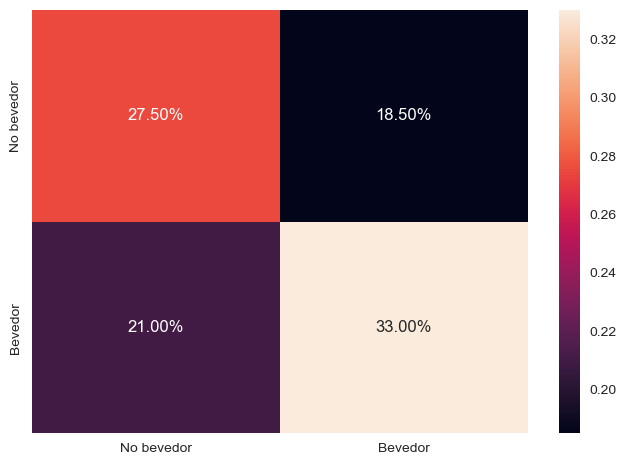

In [101]:
#confussion matrix
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['No bevedor','Bevedor']
cm = pd.DataFrame(confusion_matrix(y1_test, predict_test1), 
                  columns=classes_names, 
                  index = classes_names)
print(cm)                  
# Seaborn's heatmap to better visualize the confusion matrix
#sns.heatmap(cm, annot=True, fmt='d')
#sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
#sns.heatmap(cm/cm.sum(axis=1), annot=True, fmt='.2%')
sns.heatmap(cm/cm.sum().sum(), annot=True, fmt='.2%')

print(classification_report(y1_test, predict_test1))


(process:20704): GLib-GIO-WARNING **: 13:53:57.548: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2306.44.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:20704): GLib-GIO-WARNING **: 13:53:57.595: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.10.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


(process:18252): GLib-GIO-WARNING **: 13:53:59.775: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2306.44.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:18252): GLib-GIO-WARNING **: 13:53:59.822: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.10.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



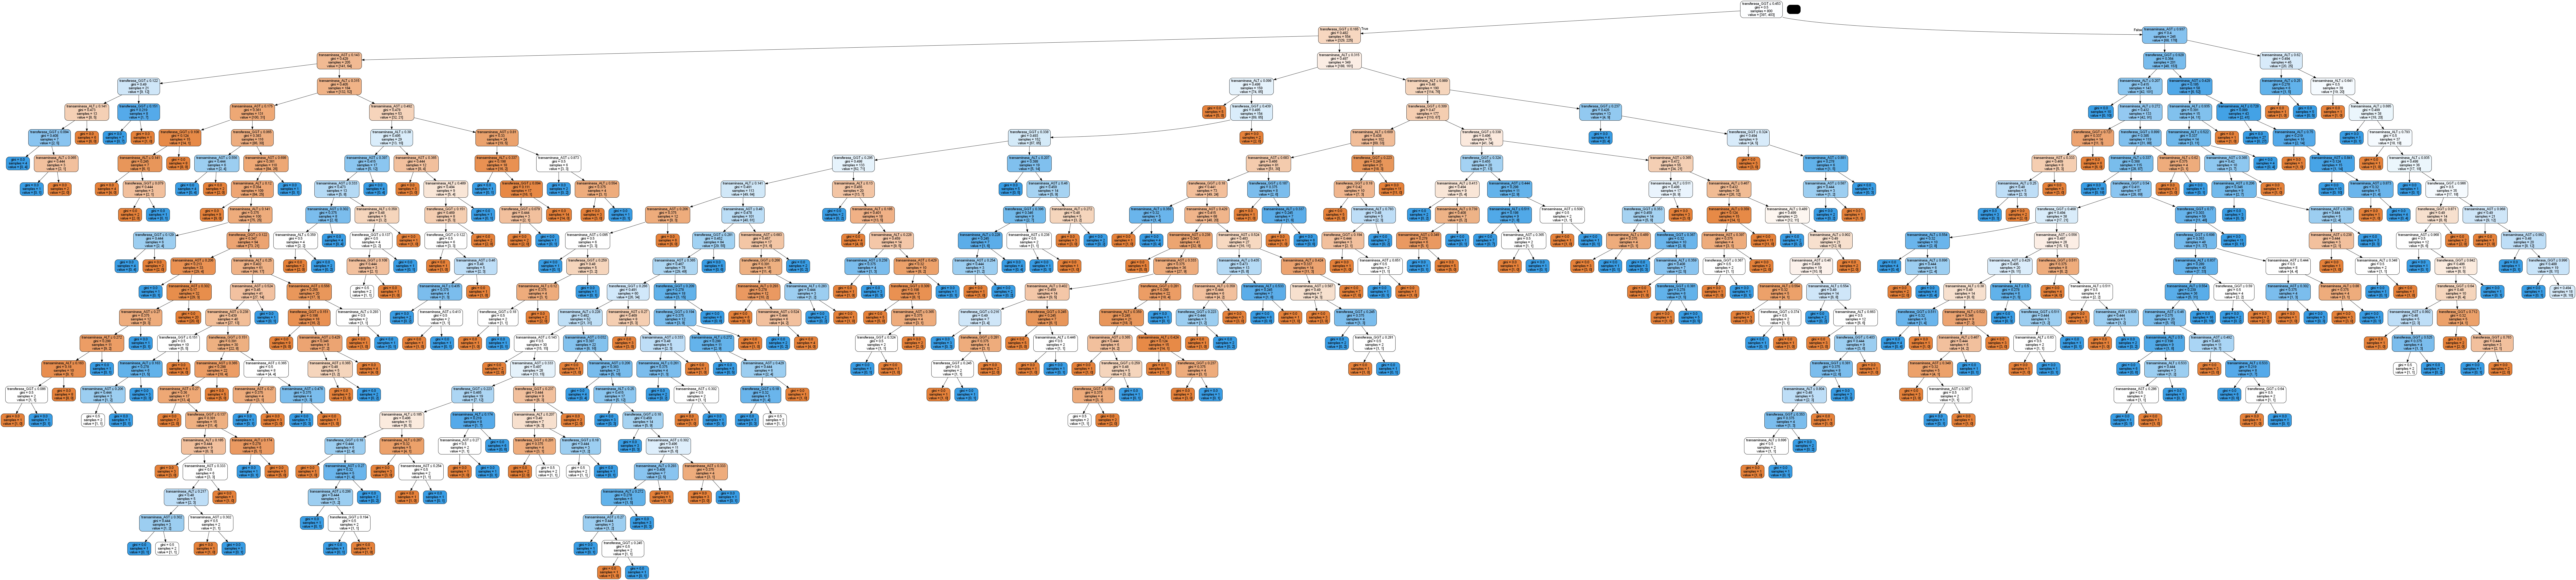

In [104]:
#Visualitzacio de l'arbre de decisió
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO  
from IPython.display import Image  
import pydotplus

#print(columnes)
dot_data = StringIO()
#export_graphviz(model1, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True,feature_names = columnes,class_names=['0','1'])
export_graphviz(model1, out_file=dot_data,feature_names = columnes,filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('D:/Users/X/Downloads/DecissionTree_Bevedor.png')
Image(graph.create_png())



Per disposar de una mesura del rendiment del model, apliquem diferents tècniques de validació creuada.

In [105]:
#https://qu4nt.github.io/sklearn-doc-es/modules/cross_validation.html
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

#Model 1
print('----- Model 1 -----')
r_sq = model1.score(X1_train, y1_train)
print(f"Train -> coeficient de determinació: {r_sq}")
#Validacio creuada
print('Cross-val')
#scores = cross_val_score(model1, X1_train, y1_train, cv=5) #cv=5 número de parts del training data
scores = cross_val_score(model1, X, y, cv=5) #cv=5 número de parts del training data
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

print('Cross-val')
#scores = cross_val_score(model1, X1_train, y1_train, cv=5, scoring='f1_macro')
scores = cross_val_score(model1, X, y, cv=5, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

print('KFold')
kfold_validacion = KFold(5) # indiquem quants folds volem
#scores = cross_val_score(model1, X1_train, y1_train, cv = kfold_validacion)
scores = cross_val_score(model1, X, y, cv = kfold_validacion)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

print('ShuffleSplit')
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
print(scores)
#scores=cross_val_score(model1, X1_train, y1_train, cv=cv)
scores=cross_val_score(model1, X, y, cv=cv)
print(scores)
print("%0.2f accuracy with a standard desviation of %0.2f" % (scores.mean(), scores.std()))


----- Model 1 -----
Train -> coeficient de determinació: 0.98
Cross-val
[0.505 0.59  0.64  0.61  0.58 ]
0.58 accuracy with a standard deviation of 0.04
Cross-val
[0.52       0.579958   0.61965769 0.609961   0.58934295]
0.58 accuracy with a standard deviation of 0.03
KFold
0.59 accuracy with a standard deviation of 0.02
ShuffleSplit
[0.58  0.595 0.62  0.595 0.57 ]
[0.56666667 0.60666667 0.62333333 0.58333333 0.55333333]
0.59 accuracy with a standard desviation of 0.03


In [ ]:
Com a conclusió, podem dir que hem creat un model que ens resol el 59% de la mostra.

<B>Model 2: K-nearest Neighbors (KNN)</B>

In [106]:
from sklearn.neighbors import KNeighborsClassifier

X2_train=X_train.to_numpy()
X2_test=X_test.to_numpy()

y2_train=y_train.to_numpy()
y2_test=y_test.to_numpy()

# Creem i entrenem el model
# En primera instancia hem dsenvolupat el models amb el valor de valors per defecte,
# i posteriorment hem triat, con veurem, el que considerem valor òptim, que ha resultat ser 15
model2 = KNeighborsClassifier(n_neighbors=15)
model2.fit(X2_train, y2_train)


KNeighborsClassifier(n_neighbors=15)

In [107]:
#Predicció i avaluació del model KNN

predict_train2 = model2.predict(X2_train)
predict_test2 = model2.predict(X2_test)

print('Model 2: KNN')
# Model Accuracy, (Exactitud?) % prediccions correctes
print("Train Accuracy:",metrics.accuracy_score(y2_train, predict_train2))
print("Test Accuracy:",metrics.accuracy_score(y2_test, predict_test2))

# Model Precision: (Precissió) % de prediccions correctes respecte de les prediccions de cada classe TP/(TP+FP)
print("Train Precision:",metrics.precision_score(y2_train, predict_train2,average=None))
print("Test Precision:",metrics.precision_score(y2_test, predict_test2,average=None))

# Model Recall: (Sensibilitat?) % de prediccions correctes respecte total de la classe TP/(TP+FN)
print("Train Recall:",metrics.recall_score(y2_train, predict_train2,average=None))
print("Test Recall:",metrics.recall_score(y2_test, predict_test2,average=None))

# Model f1: Mitja ponderada de precissió i sensibilitat 2*(Precision*Recall/(Precision+Recall)
print("Train f1:",metrics.f1_score(y2_train, predict_train2,average=None))
print("Test f1:",metrics.f1_score(y2_test, predict_test2,average=None))

Model 2: KNN
Train Accuracy: 0.66
Test Accuracy: 0.66
Train Precision: [0.65281174 0.66751918]
Test Precision: [0.60169492 0.74390244]
Train Recall: [0.67254408 0.64764268]
Test Recall: [0.77173913 0.56481481]
Train f1: [0.66253102 0.65743073]
Test f1: [0.67619048 0.64210526]


            No bevedor  Bevedor
No bevedor          71       21
Bevedor             47       61
              precision    recall  f1-score   support

           0       0.60      0.77      0.68        92
           1       0.74      0.56      0.64       108

    accuracy                           0.66       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.68      0.66      0.66       200



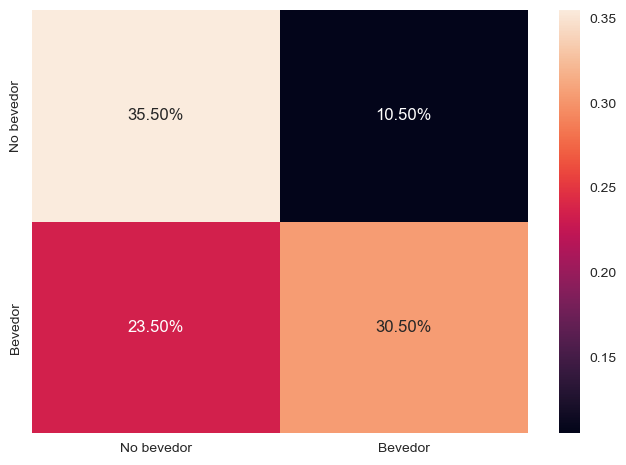

In [108]:
#confussion matrix
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['No bevedor','Bevedor']
cm = pd.DataFrame(confusion_matrix(y2_test, predict_test2), 
                  columns=classes_names, index = classes_names)
print(cm)                  
# Seaborn's heatmap to better visualize the confusion matrix
#sns.heatmap(cm, annot=True, fmt='d');
sns.heatmap(cm/cm.sum().sum(), annot=True, fmt='.2%')

print(classification_report(y2_test, predict_test2))

Text(0, 0.5, 'F1 Score')

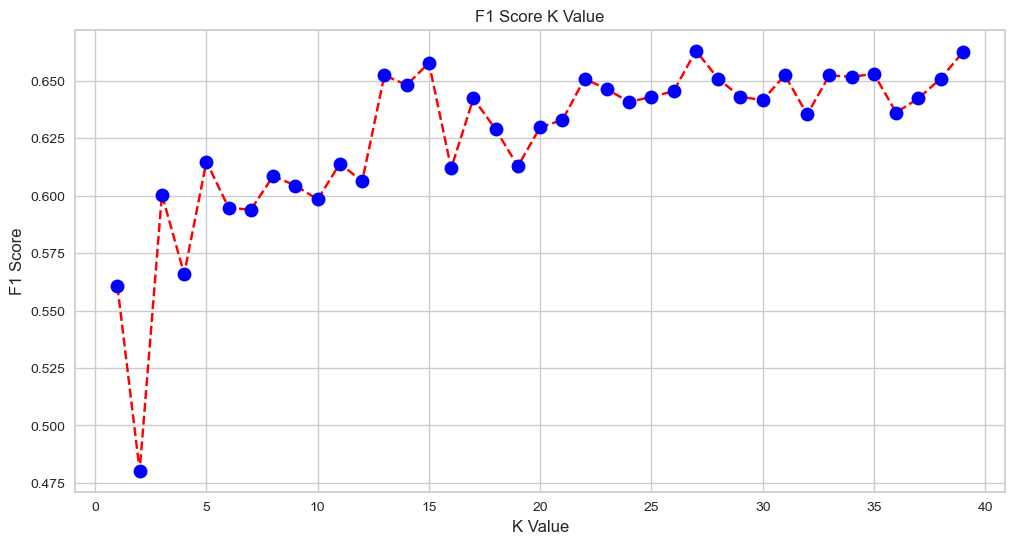

In [109]:
#Busquem el valor òptim de veïns 

import matplotlib.pyplot as plt
# Finding the best K for KNN
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2_train, y2_train)
    pred_i = knn.predict(X2_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y2_test, pred_i, average='weighted'))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

Text(0, 0.5, 'Mean Absolute Error')

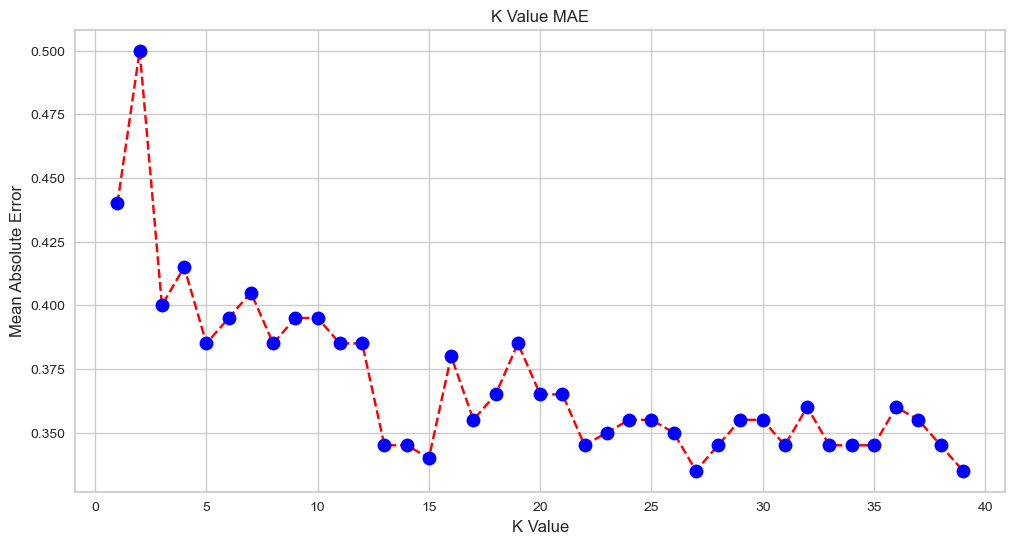

In [110]:
#Busquem el valor òptim de veïns en base a la mitja del valor absolut
from sklearn.metrics import mean_absolute_error, mean_squared_error

error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2_train, y2_train)
    pred_i = knn.predict(X2_test)
    mae = mean_absolute_error(y2_test, pred_i)
    #mse = mean_squared_error(y2_test, pred_i)
    #print(mae,mse)
    error.append(mae)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [ ]:
Hem trobat que el valor òptim de k és 15

In [112]:
#Validacio creuada

#https://qu4nt.github.io/sklearn-doc-es/modules/cross_validation.html
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter('ignore')


#Model 2
print('----- Model 2 -----')
r_sq = model2.score(X, y)
print(f"Train -> coeficient de determinació: {r_sq}")
#Validacio creuada
print('Cross-val')
scores = cross_val_score(model2, X, y, cv=5) #cv=5 número de parts del training data
print(scores)
print("%0.2f accuracy with a standard desviation of %0.2f" % (scores.mean(), scores.std()))

print('Cross-val')
scores = cross_val_score(model2, X, y, cv=5, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard desviation of %0.2f" % (scores.mean(), scores.std()))

print('KFold')
kfold_validacion = KFold(5) # indiquem quants folds volem
scores = cross_val_score(model2, X, y, cv = kfold_validacion)
print("%0.2f accuracy with a standard desviation of %0.2f" % (scores.mean(), scores.std()))

print('ShuffleSplit')
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
print(scores)
scores=cross_val_score(model2, X, y, cv=cv)
print(scores)
print("%0.2f accuracy with a standard desviation of %0.2f" % (scores.mean(), scores.std()))
warnings.resetwarnings()


----- Model 2 -----
Train -> coeficient de determinació: 0.66
Cross-val
[0.57  0.595 0.66  0.59  0.62 ]
0.61 accuracy with a standard desviation of 0.03
Cross-val
[0.56961265 0.59474672 0.66       0.58983593 0.619962  ]
0.61 accuracy with a standard desviation of 0.03
KFold
0.62 accuracy with a standard desviation of 0.02
ShuffleSplit
[0.6   0.605 0.665 0.605 0.615]
[0.61       0.58333333 0.65       0.62333333 0.59666667]
0.61 accuracy with a standard desviation of 0.02


En aquest cas el resultat és lleugeramemnt millor que en el model anterior

<B>Model 3: SVM Support Vector Machines</B>

L'objetiu principal de SVM com a model de classificació consisteix en trobar un hiperpla que separi de forma optima dues clases de dades.

In [113]:
#Importació del model svm
from sklearn import svm

#Preparacio de dades
X3_train=X_train.to_numpy()
X3_test=X_test.to_numpy()

y3_train=y_train.to_numpy()
y3_test=y_test.to_numpy()

#Creació del clasificador svm
model3 = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
model3.fit(X3_train, y3_train)

SVC(kernel='linear')

In [114]:
#Predicció i avaluació del model KNN
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predict_train3 = model3.predict(X3_train)
predict_test3 = model3.predict(X3_test)

print('Model 3: SVM')
# Model Accuracy, (Exactitud?) % prediccions correctes
print("Train Accuracy:",metrics.accuracy_score(y3_train, predict_train3))
print("Test Accuracy:",metrics.accuracy_score(y3_test, predict_test3))

# Model Precision: (Precissió) % de prediccions correctes respecte de les prediccions de cada classe TP/(TP+FP)
print("Train Precision:",metrics.precision_score(y3_train, predict_train3,average=None))
print("Test Precision:",metrics.precision_score(y3_test, predict_test3,average=None))

# Model Recall: (Sensibilitat?) % de prediccions correctes respecte total de la classe TP/(TP+FN)
print("Train Recall:",metrics.recall_score(y3_train, predict_train3,average=None))
print("Test Recall:",metrics.recall_score(y3_test, predict_test3,average=None))

# Model f1: Mitja ponderada de precissió i sensibilitat 2*(Precision*Recall/(Precision+Recall)
print("Train f1:",metrics.f1_score(y3_train, predict_train3,average=None))
print("Test f1:",metrics.f1_score(y3_test, predict_test3,average=None))

Model 3: SVM
Train Accuracy: 0.62625
Test Accuracy: 0.635
Train Precision: [0.58390411 0.74074074]
Test Precision: [0.56375839 0.84313725]
Train Recall: [0.85894207 0.39702233]
Test Recall: [0.91304348 0.39814815]
Train f1: [0.69520897 0.51696284]
Test f1: [0.69709544 0.5408805 ]


            No bevedor  Bevedor
No bevedor          84        8
Bevedor             65       43
              precision    recall  f1-score   support

           0       0.56      0.91      0.70        92
           1       0.84      0.40      0.54       108

    accuracy                           0.64       200
   macro avg       0.70      0.66      0.62       200
weighted avg       0.71      0.64      0.61       200



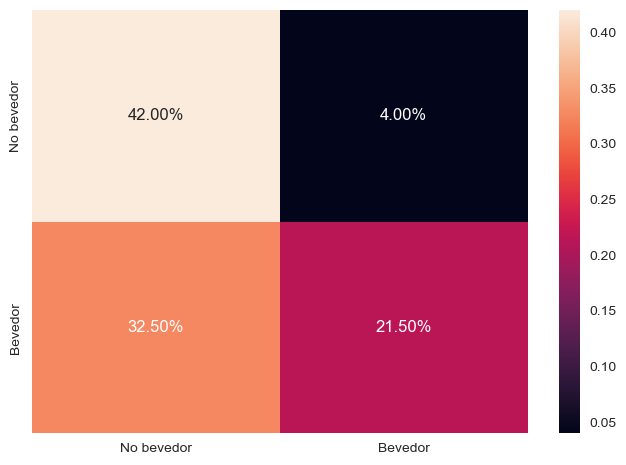

In [116]:
#confussion matrix
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['No bevedor','Bevedor']
cm = pd.DataFrame(confusion_matrix(y3_test, predict_test3), 
                  columns=classes_names, index = classes_names)
print(cm)                  
# Seaborn's heatmap to better visualize the confusion matrix
#sns.heatmap(cm, annot=True, fmt='d');
sns.heatmap(cm/cm.sum().sum(), annot=True, fmt='.2%')

print(classification_report(y3_test, predict_test3))

In [118]:
#Validacio creuada

#https://qu4nt.github.io/sklearn-doc-es/modules/cross_validation.html
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter('ignore')

#Model 3
print('----- Model 3 -----')
r_sq = model3.score(X, y)
print(f"Train -> coeficient de determinació: {r_sq}")
#Validacio creuada
print('Cross-val')
scores = cross_val_score(model3, X, y, cv=5) #cv=5 número de parts del training data
print(scores)
print("%0.2f accuracy with a standard desviation of %0.2f" % (scores.mean(), scores.std()))

print('Cross-val')
scores = cross_val_score(model3, X, y, cv=5, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard desviation of %0.2f" % (scores.mean(), scores.std()))

print('KFold')
kfold_validacion = KFold(5) # indiquem quants folds volem
scores = cross_val_score(model3, X, y, cv = kfold_validacion)
print("%0.2f accuracy with a standard desviation of %0.2f" % (scores.mean(), scores.std()))

print('ShuffleSplit')
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
print(scores)
scores=cross_val_score(model3, X, y, cv=cv)
print(scores)
print("%0.2f accuracy with a standard desviation of %0.2f" % (scores.mean(), scores.std()))
warnings.resetwarnings()


----- Model 3 -----
Train -> coeficient de determinació: 0.628
Cross-val
[0.62  0.595 0.685 0.62  0.64 ]
0.63 accuracy with a standard desviation of 0.03
Cross-val
[0.60869117 0.57723323 0.67504836 0.60246888 0.62168979]
0.62 accuracy with a standard desviation of 0.03
KFold
0.63 accuracy with a standard desviation of 0.04
ShuffleSplit
[0.6   0.605 0.695 0.6   0.655]
[0.63       0.60666667 0.60666667 0.66666667 0.63333333]
0.63 accuracy with a standard desviation of 0.02


En aquest tercer model guanyem una décima mes en la precissió

<B>Model 4: Logistic Regression</B>

És un mètode que utilitza un model logístic per calcular la probabilitat de que una instancia de dades pertanyi a una de les dues clases en un problema de clasificació binaria. El modelo logístic es basa en una función logística coneguda com a funció sigmoide.

In [119]:
#Importació de les llibreries del model
from sklearn.linear_model import LogisticRegression

#Preparacio de dades
X4_train=X_train.to_numpy()
X4_test=X_test.to_numpy()

y4_train=y_train.to_numpy()
y4_test=y_test.to_numpy()

#Creació del clasificador svm
model4 = LogisticRegression(random_state=16)
#Entrenament del model
model4.fit(X4_train, y4_train)


LogisticRegression(random_state=16)

In [121]:
#Predicció i avaluació del model Logistic Regression
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

predict_train4 = model4.predict(X4_train)
predict_test4 = model3.predict(X4_test)

print('Model 4: Logistic Regression')
# Model Accuracy, (Exactitud?) % prediccions correctes
print("Train Accuracy:",metrics.accuracy_score(y4_train, predict_train4))
print("Test Accuracy:",metrics.accuracy_score(y4_test, predict_test4))

# Model Precision: (Precissió) % de prediccions correctes respecte de les prediccions de cada classe TP/(TP+FP)
print("Train Precision:",metrics.precision_score(y4_train, predict_train4,average=None))
print("Test Precision:",metrics.precision_score(y4_test, predict_test4,average=None))

# Model Recall: (Sensibilitat?) % de prediccions correctes respecte total de la classe TP/(TP+FN)
print("Train Recall:",metrics.recall_score(y3_train, predict_train4,average=None))
print("Test Recall:",metrics.recall_score(y3_test, predict_test4,average=None))

# Model f1: Mitja ponderada de precissió i sensibilitat 2*(Precision*Recall/(Precision+Recall)
print("Train f1:",metrics.f1_score(y4_train, predict_train4,average=None))
print("Test f1:",metrics.f1_score(y4_test, predict_test4,average=None))

Model 4: Logistic Regression
Train Accuracy: 0.635
Test Accuracy: 0.635
Train Precision: [0.6056338  0.68316832]
Test Precision: [0.56375839 0.84313725]
Train Recall: [0.7581864  0.51364764]
Test Recall: [0.91304348 0.39814815]
Train f1: [0.67337808 0.58640227]
Test f1: [0.69709544 0.5408805 ]


            No bevedor  Bevedor
No bevedor          84        8
Bevedor             65       43
              precision    recall  f1-score   support

           0       0.56      0.91      0.70        92
           1       0.84      0.40      0.54       108

    accuracy                           0.64       200
   macro avg       0.70      0.66      0.62       200
weighted avg       0.71      0.64      0.61       200



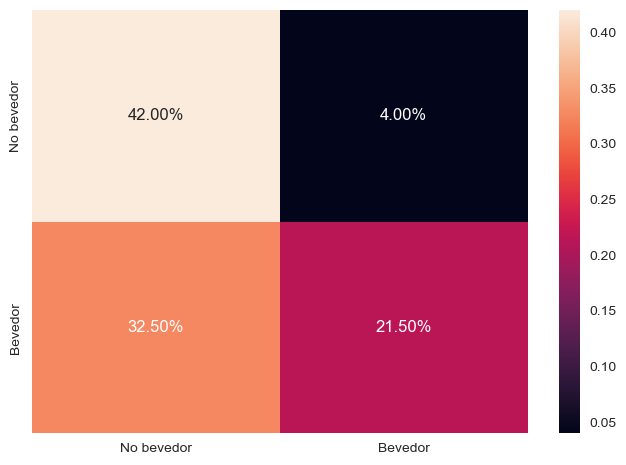

In [122]:
#confussion matrix
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['No bevedor','Bevedor']
cm = pd.DataFrame(confusion_matrix(y4_test, predict_test4), 
                  columns=classes_names, index = classes_names)
print(cm)                  
# Seaborn's heatmap to better visualize the confusion matrix
#sns.heatmap(cm, annot=True, fmt='d');
sns.heatmap(cm/cm.sum().sum(), annot=True, fmt='.2%')

print(classification_report(y4_test, predict_test4))

In [123]:
#Validacio creuada

#https://qu4nt.github.io/sklearn-doc-es/modules/cross_validation.html
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter('ignore')

#Model 4
print('----- Model 4 -----')
r_sq = model4.score(X, y)
print(f"Train -> coeficient de determinació: {r_sq}")
#Validacio creuada
print('Cross-val')
scores = cross_val_score(model4, X, y, cv=5) #cv=5 número de parts del training data
print(scores)
print("%0.2f accuracy with a standard desviation of %0.2f" % (scores.mean(), scores.std()))

print('Cross-val')
scores = cross_val_score(model4, X, y, cv=5, scoring='f1_macro')
print(scores)
print("%0.2f accuracy with a standard desviation of %0.2f" % (scores.mean(), scores.std()))

print('KFold')
kfold_validacion = KFold(5) # indiquem quants folds volem
scores = cross_val_score(model4, X, y, cv = kfold_validacion)
print("%0.2f accuracy with a standard desviation of %0.2f" % (scores.mean(), scores.std()))

print('ShuffleSplit')
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
print(scores)
scores=cross_val_score(model4, X, y, cv=cv)
print(scores)
print("%0.2f accuracy with a standard desviation of %0.2f" % (scores.mean(), scores.std()))
warnings.resetwarnings()


----- Model 4 -----
Train -> coeficient de determinació: 0.645
Cross-val
[0.605 0.65  0.67  0.635 0.655]
0.64 accuracy with a standard desviation of 0.02
Cross-val
[0.60212536 0.64827656 0.66917293 0.62822439 0.64952381]
0.64 accuracy with a standard desviation of 0.02
KFold
0.64 accuracy with a standard desviation of 0.03
ShuffleSplit
[0.595 0.65  0.675 0.625 0.665]
[0.64       0.59666667 0.62       0.67333333 0.62333333]
0.63 accuracy with a standard desviation of 0.03


Resultats similars al model anterior

<B> Comparativa de resultats dels diferents models </B>

In [124]:
#Comparativa de resultats dels models definits sobre els test datasets

print('----- % de prediccions correctes: Accuracy -----')
print("Model 1 Decission Tree Test Accuracy:",metrics.accuracy_score(y1_test, predict_test1))
print("Model 2 KNN Test Accuracy:",metrics.accuracy_score(y2_test, predict_test2))
print("Model 3 SVM Test Accuracy:",metrics.accuracy_score(y3_test, predict_test3))
print("Model 4 Logistic Regression Test Accuracy:",metrics.accuracy_score(y4_test, predict_test4))

print('----- % de error en les prediccions: Misclassification Rate -----')
print("Model 1 Decission Tree Test Misclassification Rate:",1-metrics.accuracy_score(y1_test, predict_test1))
print("Model 2 KNN Test Misclassification Rate:",1-metrics.accuracy_score(y2_test, predict_test2))
print("Model 3 SVM Test Misclassification Rate:",1-metrics.accuracy_score(y3_test, predict_test3))
print("Model 4 Logistic Regression Misclassification Rate:",1-metrics.accuracy_score(y4_test, predict_test4))

print('----- Model performance: Matriu de Confusió -----')
classes_names = ['No bevedor','Bevedor']
cm1 = pd.DataFrame(confusion_matrix(y1_test, predict_test1), 
                  columns=classes_names, index = classes_names)
cm2 = pd.DataFrame(confusion_matrix(y2_test, predict_test2), 
                  columns=classes_names, index = classes_names)
cm3 = pd.DataFrame(confusion_matrix(y3_test, predict_test3), 
                  columns=classes_names, index = classes_names)
cm4 = pd.DataFrame(confusion_matrix(y4_test, predict_test4), 
                  columns=classes_names, index = classes_names)
print('Model 1 Decission Tree Matriu de confusió')
print(cm1)
print('Model 2 KNN Matriu de confusió')
print(cm2)
print('Model 3 SVM Matriu de confusió')
print(cm3)
print('Model 4 Logistic Regression Matriu de confusió')
print(cm4)

print('----- Precision =  TP/(TP+FP) Valors ponderats-----')
print("Model 1 Decission Tree Test Precision:\t\t",metrics.precision_score(y1_test, predict_test1,average='weighted'))
print("Model 2 KNN Test Precision:\t\t\t",metrics.precision_score(y2_test, predict_test2,average='weighted'))
print("Model 3 SVM Test Precision:\t\t\t",metrics.precision_score(y3_test, predict_test3,average='weighted'))
print("Model 4 Logistic Regression Test Precision:\t",metrics.precision_score(y4_test, predict_test4,average='weighted'))

print('----- Sensitive = True positive rate = recall TP/(TP+FN) Valors ponderats-----')
print("Model 1 Decission Tree Test Recall:\t\t",metrics.recall_score(y1_test, predict_test1,average='weighted'))
print("Model 2 KNN Test Recall:\t\t\t",metrics.recall_score(y2_test, predict_test2,average='weighted'))
print("Model 3 SVM Test Recall:\t\t\t",metrics.recall_score(y3_test, predict_test3,average='weighted'))
print("Model 4 Logistic Regression Test Recall:\t",metrics.recall_score(y4_test, predict_test4,average='weighted'))

print('----- f1-score Valors ponderats-----')
print("Model 1 Decission Tree Test f1-score:\t\t",metrics.f1_score(y1_test, predict_test1,average='weighted'))
print("Model 2 KNN Test f1-score:\t\t\t",metrics.f1_score(y2_test, predict_test2,average='weighted'))
print("Model 3 SVM Test f1-score:\t\t\t",metrics.f1_score(y3_test, predict_test3,average='weighted'))
print("Model 4 Logistic Regression Test f1-score:\t",metrics.f1_score(y4_test, predict_test4,average='weighted'))


----- % de prediccions correctes: Accuracy -----
Model 1 Decission Tree Test Accuracy: 0.605
Model 2 KNN Test Accuracy: 0.66
Model 3 SVM Test Accuracy: 0.635
Model 4 Logistic Regression Test Accuracy: 0.635
----- % de error en les prediccions: Misclassification Rate -----
Model 1 Decission Tree Test Misclassification Rate: 0.395
Model 2 KNN Test Misclassification Rate: 0.33999999999999997
Model 3 SVM Test Misclassification Rate: 0.365
Model 4 Logistic Regression Misclassification Rate: 0.365
----- Model performance: Matriu de Confusió -----
Model 1 Decission Tree Matriu de confusió
            No bevedor  Bevedor
No bevedor          55       37
Bevedor             42       66
Model 2 KNN Matriu de confusió
            No bevedor  Bevedor
No bevedor          71       21
Bevedor             47       61
Model 3 SVM Matriu de confusió
            No bevedor  Bevedor
No bevedor          84        8
Bevedor             65       43
Model 4 Logistic Regression Matriu de confusió
            No

Vists conjuntaments els diferents resultats dels models desenvolupats, em decidiria per un model de KNN que ofereix una precisió dels 65% i una bon equilibri entre la resta d'indicadors

<B>Mètriques avançades</B>

La corva ROC es un gràfic que mmostra la relació entre la tasa de verdaders positius (sensibilidad) y la tasa de falsos positius (especificidad) en funció de l'umbral de decisió emprat per un model de clasificació.  
La corva ROC mostra com varia l'equilibri entre verdaders positius y falsos positius a mesura que s'ajusta l'umbral de clasificació.
L'área sota la corva AUC és una métrica numérica que quantifica la qualitat del modelo en funció de la corva ROC.
El valor AUC varia entre 0 y 1, 0 indica un rendiment baix (pitjor que un model aleatori) y 1 indica un rendiment perfecte. 
Quan major sigui el valor de l'AUC, millor serà el rendiment del model en la clasificación binaria.

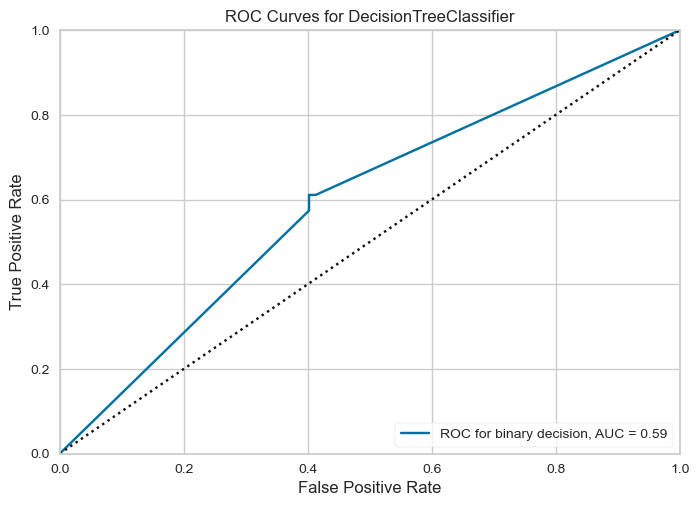

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [125]:
from yellowbrick.classifier import ROCAUC

#visualizer = ROCAUC(model1, is_fitted=True) # classes=["Clase 1", "Clase 2","Classe 3"])
visualizer = ROCAUC(model1,encoder={0: 'No bevedor',1: 'Bevedor'},binary=True)

visualizer.fit(X1_train, y1_train)        # Fit the training data to the visualizer
visualizer.score(X1_test, y1_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

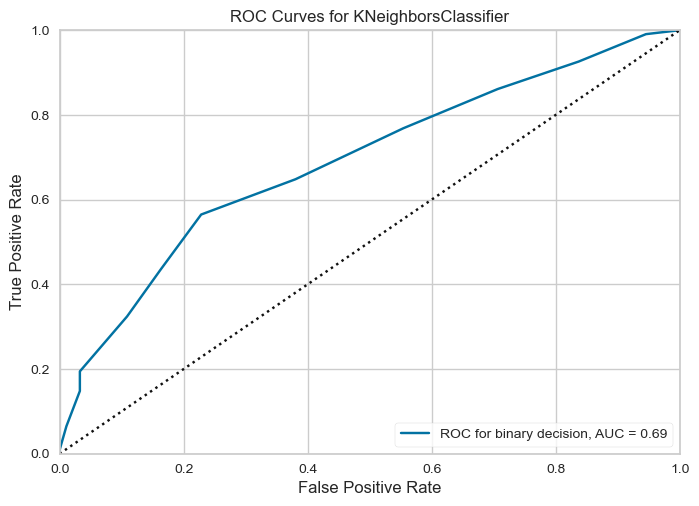

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [126]:
from yellowbrick.classifier import ROCAUC

#visualizer = ROCAUC(model2, is_fitted=True) # classes=["Clase 1", "Clase 2","Classe 3"])
visualizer = ROCAUC(model2,encoder={0: 'No bevedor',1: 'Bevedor'},binary=True)

visualizer.fit(X2_train, y2_train)        # Fit the training data to the visualizer
visualizer.score(X2_test, y2_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

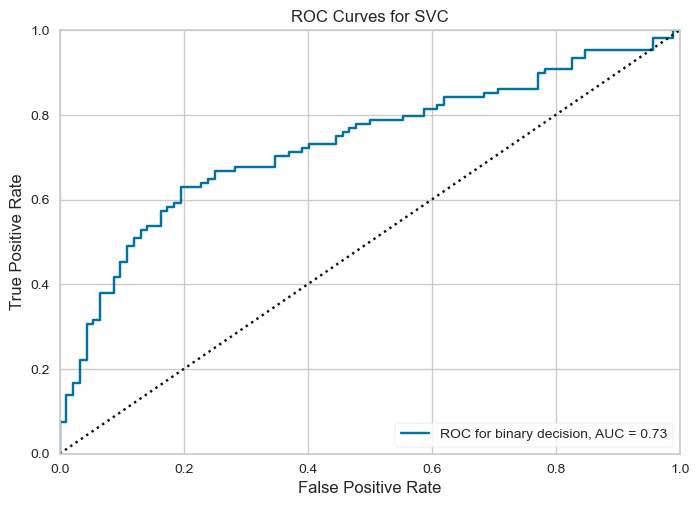

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [127]:
from yellowbrick.classifier import ROCAUC

#visualizer = ROCAUC(model3, is_fitted=True) # classes=["Clase 1", "Clase 2","Classe 3"])
visualizer = ROCAUC(model3,encoder={0: 'No bevedor',1: 'Bevedor'},binary=True)

visualizer.fit(X3_train, y3_train)        # Fit the training data to the visualizer
visualizer.score(X3_test, y3_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

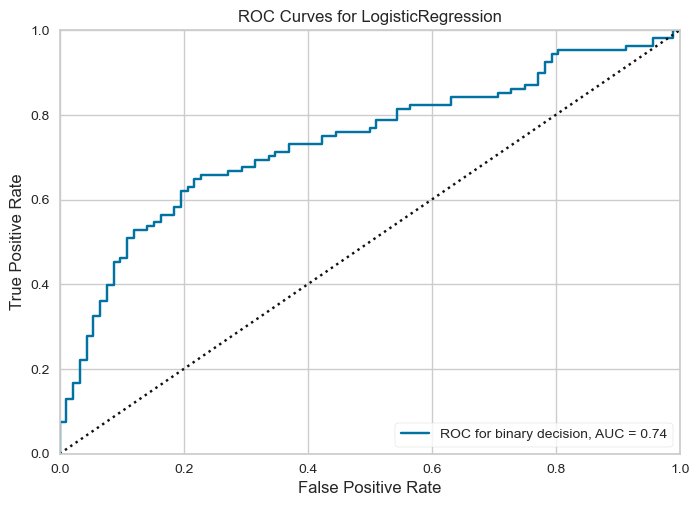

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [128]:
from yellowbrick.classifier import ROCAUC

#visualizer = ROCAUC(model3, is_fitted=True) # classes=["Clase 1", "Clase 2","Classe 3"])
visualizer = ROCAUC(model4,encoder={0: 'No bevedor',1: 'Bevedor'},binary=True)

visualizer.fit(X4_train, y4_train)        # Fit the training data to the visualizer
visualizer.score(X4_test, y4_test)        # Evaluate the model on the test data
visualizer.show()     